# Introduction

I am identifying news items as "true" or "fake" for this project, which will be a binary classification issue - classifying the samples as positive (containing fake news) or negative (without fake news).

Attribute:

*   text - text of the article; could be incomplete
*   title -title of a news article
*   subject - subject of the news.
*   date - date of a news article

Importing dataset -downloaded dataset from kaggle

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
fake = pd.read_csv("/content/drive/MyDrive/ML Project/Fake.csv")
true = pd.read_csv("/content/drive/MyDrive/ML Project/True.csv")

In [143]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [144]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Inserting a column called "class" for fake and real news dataset to categorize fake and true news.
#### Creating  category called "class" for fake and real news dataset to categorize fake and true news before I combined the dataset. Classified fake and true by - numerical value.

In [145]:
fake["class"] = 0
true["class"] = 1

Lets check the shape of the dataset

In [146]:
fake.shape, true.shape

((23481, 5), (21417, 5))

#Removing the Reuters

In [147]:
# Remove the Reuters, city and twitter parts from true dataset
# Function with one accepting string statement.

def remove_news_name(iLine):
    # Split the string to list based on ") -". Because it is observed that most of the real dataset have "Reuters) - "
    line = iLine.split(') -')
    # If the above split is successful then we will have 2 items in list and we take the second block in try else we go to except
    try:
      line = line[1]
    except:
      # The news that dont contain ") -" contained ": -". So we split and remove them by next try except block.
      try:
          line = iLine.split(': -')
          line = line[1]
      except:
          # There are news with neither of both. Then we take the whole line. The frequency of such is <5%
          print(line)
          pass
    return str(line)

In [148]:
# Apply keyword applies the function to each row of the pandas dataframe. This is like calling the above function for every row in pandas dataframe.
# We replace the filtered result in same column.
true['text'] = true['text'].apply(remove_news_name)

['WASHINGTON - Some key U.S. senators still had concerns about the Republican tax bill in the Senate, as a procedural motion to formally open debate on the measure was approved on Wednesday.  Here is a list of Republicans pivotal to the bill’s fate. The moderate senator from Maine has qualms about Republicans’ plan to include in the tax bill a repeal of a federal fee imposed on people who do not comply with Obamacare’s “individual mandate.” The fee is meant to encourage young, healthy people to get health insurance so that premiums are affordable for old, sick people. Collins and others fear repealing the fine would drive up insurance premium costs, canceling out tax-cut gains that many of their constituents might get from the tax bill. Collins said Republican leaders had promised her to take up two healthcare provisions before the end of the year to help mitigate the impact of repealing the fee. Those provisions would help insurers cover expensive patients and continue Obamacare subsi

In [149]:
fake.shape, true.shape

((23481, 5), (21417, 5))

In [150]:
fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [151]:
true.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017",1


# Merging True and Fake Dataframes
Merged the two dataset in single dataset and save it in a csv file by using concat function in pandas.


In [152]:
# Lets combine the fake and real datasets. Concat is concatenation. So the true dataset is concatenated to fake and the new dataframe is called as merge.
merge = pd.concat([fake, true], axis =0 )
merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [153]:
# Check the number of rows in merged dataframe
merge.shape

(44898, 5)

In [154]:
merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

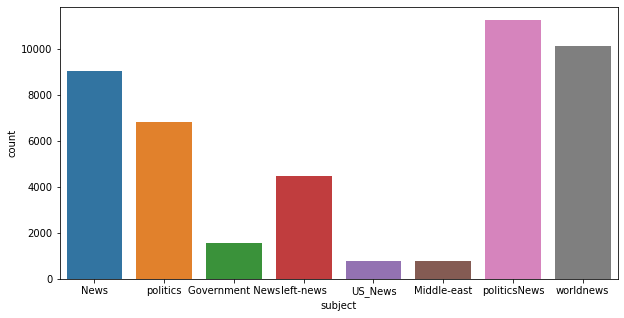

In [155]:
# Let’s start by looking at the count of news types in our dataset. 

# Our dataset has more political news than any other news followed by world news.
# We have some repeated class names which express the same meaning such as news, politics, government news, etc which is similar to the alternative. 

plt.figure(figsize=(10,5))
sns.countplot(x='subject', data=merge)

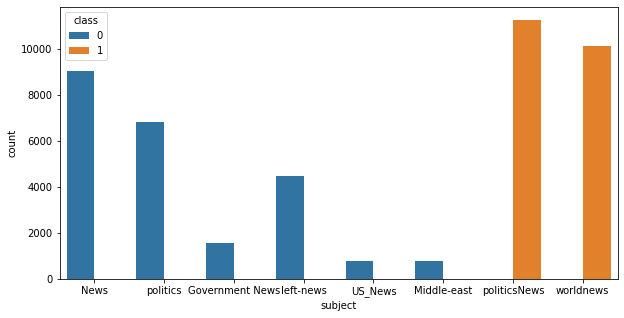

In [156]:
# Let’s look at the class based on the fake/true outcome.

# from the boxplot you can see the that fake class=0 is greater than the true class=1

plt.figure(figsize=(10,5))
sns.countplot(x='subject', hue='class', data=merge)

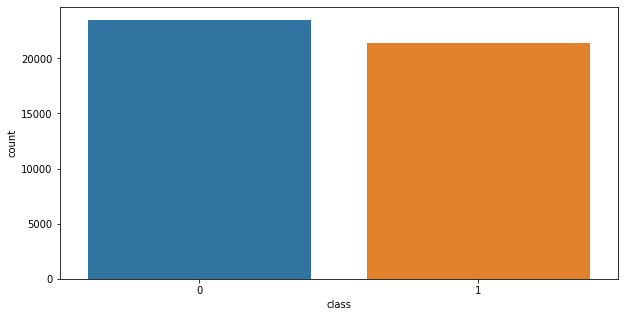

In [157]:
# Verify the class balance in merged dataframe. Both classes have roughly same number of observations.

# Let’s check the count of fake and true news and confirm whether our data is balanced or not.

# from the boxplot showing the fake and true news are almost balanced.

# We have a pretty much-balanced data but the count of fake news is higher than the true news but not so.

plt.figure(figsize=(10,5))
sns.countplot(x='class', data=merge)

# Removing columns : "subject" and "date" columns

I have dropped the subject - Because the news subject column has a non-consistent distribution in both the real and fake news datasets, so I will drop it.

dropped date -  as its not important and doesnt have impact as well.

In [158]:
# We are interested in the complete text so remove the other columns.

df = merge.drop(["subject","date"], axis = 1)

In [159]:
df.isnull().sum()

title    0
text     0
class    0
dtype: int64

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   44898 non-null  object
 1   text    44898 non-null  object
 2   class   44898 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.4+ MB


# Random Shuffling the dataframe

In [161]:
# Shuffle the dataset

df = df.sample(frac = 1)

In [162]:
df.head(10)

,title,text,class
6479,Incoherent Lady Goes On CNN To Inform Paul Ry...,If there s one thing politicians should be ter...,0
5081,Speaker Ryan says Republican healthcare plan w...,U.S. House Speaker Paul Ryan said on Tuesday ...,1
2356,Tillerson says he and Trump disagree over Iran...,U.S. Secretary of State Rex Tillerson acknowl...,1
6955,This Moving Message To Trump Supporters Might...,What started as a prank to annoy Trump support...,0
10911,FURIOUS FBI Agents Speak Out On Clinton Email ...,FBI Agents are coming forward now to voice the...,0
16454,Fugitives in Kim Jong Nam killing changed clot...,Four men suspected of killing the North Korea...,1
11930,Thai junta says to allow parties to get ready ...,Thai Prime Minister Prayuth Chan-ocha said on...,1
21564,WOW! COMPANY THAT BUYS ABORTED BABY PARTS FROM...,Last we checked harvesting and selling body pa...,0
11013,A low-key Trump ends social media silence,After what seemed like a very long silence by...,1
542,GOP Implodes As Trump Launches Nasty Public F...,Donald Trump is continuing to dig himself into...,0


Resetting the index to make it easier to work with the dataframe.

In [163]:
# Since we shuffled the dataset, the index is no longer consecutive. So reset the index
df.reset_index(inplace = True)

# This creates an additional column index which is not needed. So remove the index column.
df.drop(["index"], axis = 1, inplace = True)

In [164]:
df.columns

Index(['title', 'text', 'class'], dtype='object')

In [165]:
df.head(10)

,title,text,class
0,Incoherent Lady Goes On CNN To Inform Paul Ry...,If there s one thing politicians should be ter...,0
1,Speaker Ryan says Republican healthcare plan w...,U.S. House Speaker Paul Ryan said on Tuesday ...,1
2,Tillerson says he and Trump disagree over Iran...,U.S. Secretary of State Rex Tillerson acknowl...,1
3,This Moving Message To Trump Supporters Might...,What started as a prank to annoy Trump support...,0
4,FURIOUS FBI Agents Speak Out On Clinton Email ...,FBI Agents are coming forward now to voice the...,0
5,Fugitives in Kim Jong Nam killing changed clot...,Four men suspected of killing the North Korea...,1
6,Thai junta says to allow parties to get ready ...,Thai Prime Minister Prayuth Chan-ocha said on...,1
7,WOW! COMPANY THAT BUYS ABORTED BABY PARTS FROM...,Last we checked harvesting and selling body pa...,0
8,A low-key Trump ends social media silence,After what seemed like a very long silence by...,1
9,GOP Implodes As Trump Launches Nasty Public F...,Donald Trump is continuing to dig himself into...,0


Defining X and Y

In [166]:
x = df["text"]
y = df["class"]

##Splitting the dataset into training set and testing set.

Splitting data into training and testting is important part of evaluating data models. Splitting data helps confirm the creation of data models and processes that use data models. If we would not split the data into different sets the model would be evaluated on the same data it has seen during training.  We could ecnounter some problems such as overfitting.

The train-test split procedure is applicable when you have a very large dataset, a valuable model to train, or require a good estimate of model performance quickly.


------
Train/test split: The input data is divided into two parts, that are training set and test set on a ratio of 70:30, 80:20, etc. It provides a high variance, which is one of the biggest disadvantages.

•	Training Data: The training data is used to train the model, and the dependent variable is known.

•	Test Data: The test data is used to make the predictions from the model that is already trained on the training data. This has the same features as training data but not the part of that.

Cross-Validation dataset: It is used to overcome the disadvantage of train/test split by splitting the dataset into groups of train/test splits, and averaging the result. It can be used if we want to optimize our model that has been trained on the training dataset for the best performance. It is more efficient as compared to train/test split as every observation is used for the training and testing both.


In [167]:
# This will split the dataframe into 75% of training and 25% of test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

Vectorization is process of mapping our natural language into numerical values which is used to make predictions using different machine learning algorithms. 


Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector.

TF-IDF is a text vectorizer that transforms the text into a usable vector. It combines 2 concepts, Term Frequency (TF) and Document Frequency (DF).

TF is the number of occurrences of a specific term in a document. It also indicates how important a specific term in a document. TF represents every text from the data as a matrix whose rows are the number of documents and columns are the number of distinct terms throughout all documents.



In [168]:
# The feature is a bunch of words. A simple and popular way to convert words to feature is term frequency and inverse document frequency.
# The intuition behind tfidf is that it rates a higher value to the words that are more unique towards one row. This is done by 
# multiplying two fractions i.e. tf and idf.
# tf is term frequency i.e. fraction of number of times word t is in the news to number of words in the news.
# idf is the fraction of log of total number of documents to the number of documents the word t is present in it.

# A sparse matrix of size (1 * number of total words) is formed for each news article.
# A sparse matrix of size (number of rows * number of total words) is formed for entire dataset.
# A sparse matrix is matrix that contains a lot of zeroes

from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

#Training Models

a classifier - is an algorithm that maps the input data to a specific category.

classification - refers to a predictive modeling problem where a class label is predicted for a given example of input data.

Classification - is a process of categorizing a given set of data into classes.

Classification Model – The model predicts or draws a conclusion to the input data given for training, it will predict the class or category for the data.

a class - is a discrete value from a set of predefined values

The classes - are often referred to as target, label or categories.

data set -  collection of data pieces that can be treated by a computer as a single unit for analytic and prediction purposes.

Graphs are data structures that can be ingested by various algorithms


#Logistic Regression 

Logistic regression is a simple and more efficient method for binary and linear classification problems. It is a classification model, which is very easy to realize and achieves very good performance with linearly separable classes.

In [169]:
# lets first fit a simple model with no tuning
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

#fitting training set to the model
LR.fit(xv_train,y_train)

LogisticRegression()

In [170]:
# Predicting the test set results based on the model.
predictions = LR.predict(xv_test)

In [171]:
LR.score = accuracy_score(y_test, predictions) 
LR.score

0.9805790645879733

We got a 98% accuracy. It is very high. This is due to the fact that words can be unique to each news article and the algorithms looks at those words(matrix values) and produce a result.

This can be biased because the algorithm is only good to this dataset split.

#Model Improvement 

Lets try to improve the model a bit using GridSearch.

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [173]:
# Create a log space for grid search
grid={"C":np.logspace(-2,2,5), "penalty":["l2"]}
LR_Grid = LogisticRegression(max_iter=10000)

# Perform model selection using cross validation
LR_grid = GridSearchCV(LR_Grid, grid, cv=5)
LR_grid.fit(xv_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l2']})

In [177]:
# Predicting the test set results based on the model
predictions = LR_grid.predict(xv_test)

In [178]:
LR_grid.best_params_

{'C': 100.0, 'penalty': 'l2'}

In [180]:
accuracy_score(y_test, predictions)

0.9890423162583519

##Decision Tree Classifier

A decision tree is just an analogy of how a human thinks to take a decision with yes/no questions.

A decision tree begins with a single point (or 'node') and then branches (or'splits') in two or more ways. 

Decision trees can help to divide down complicated data into more manageable data. It is frequently used in various domains for prediction analysis, data categorization, and regression. Decision trees can deal with complex data, which is part of what makes them useful.

DT - that builds the classification model in the form of a tree structure.

The process goes on with breaking down the data into smaller structures and eventually associating it with an incremental decision tree. The final structure looks like a tree with nodes and leaves


Advantages of using DT:

*   Requires minimal preparation or data cleaning before use.
*   Excellent for dealing with both numerical and non-numerical data.


In [181]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [182]:
# lets first fit a simple model with no tuning
# fitting training set to the model
DT.fit(xv_train, y_train)

# Predicting the test set results based on the model.
predictions = DT.predict(xv_test)

In [183]:
DT.score = accuracy_score(y_test, predictions) 
DT.score

0.949576837416481

I have got 94% accuracy. As you can see this is a flawed dataset and also why I can easily get such higher accuracy without any effort in processing it. Thats why I have tried to predict using the GridSearch to compare from Decision Tree method which made it the same accuracy.

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” both for the Shannon information gain.


So let's go with Decision Tree with hyperparameter tuning.

# Model Improvement using GridSearch

In [184]:
params = {'criterion' : ['gini', 'entropy'], 'max_depth': [1,2,3,4,5,6,7,8,9,10]}

In [185]:
grid = GridSearchCV(DT, params, verbose=1)

In [186]:
grid.fit(xv_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=1)

In [187]:
predictions = grid.predict(xv_test)

In [188]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [189]:
accuracy_score(y_test, predictions)

0.9376391982182628

GridSearch reached 93% a slightly improved compare to Decision Tree method.

#Results

After implementing the machine learning algorithm, the accuracy of each classifier is calculated. It can be observed that DT and LR classifiers have both accuracy above 80% and the other classifier is below 80%. The results show that Logistic Regression has the most performance on this dataset in the model compare to Decision Tree.

I also think that the datasets are flawed because the results are close to 98% which is often not true in Machine Learning. That is why, I have used Gridsearch to improve the models of each classifiers. However, I still have the same results.

This can be biased because the algorithm is only good to this dataset split.

In [190]:
model_comparison = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree'],
'Accuracy': [LR.score, DT.score]})
model_comparison

,Model,Accuracy
0,Logistic Regression,0.980579
1,Decision Tree,0.949577


Text(0.5, 0, 'Accuracy')

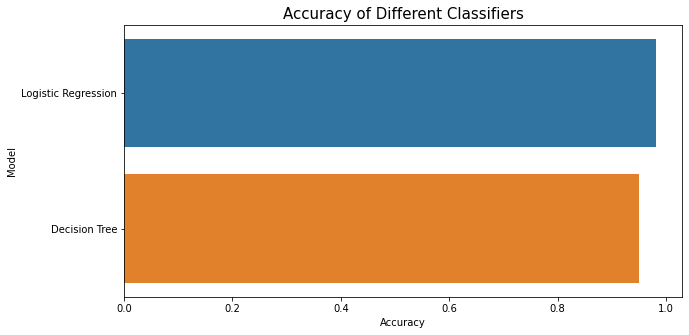

In [191]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Accuracy', y = 'Model', data = model_comparison)
plt.title("Accuracy of Different Classifiers", fontsize = 15)
plt.xlabel('Accuracy', fontsize = 10)